### _Exercise_

#### Lakukan import Pandas, Numpy, dan Seaborn

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

#### Lakukan _load_ terhadap dataset `bikesharing_data.csv`

In [2]:
os.getcwd()

'C:\\Users\\ameli\\OneDrive\\Documents\\DataScience Python\\belajar_python\\data_science_II\\code'

In [3]:
os.chdir("C:\\Users\\ameli\\OneDrive\\Documents\\DataScience Python\\belajar_python\\data_science_II\\data\\input")

In [4]:
os.listdir()

['bikesharing_data.csv',
 'data1.xlsx',
 'data_iris.csv',
 'kaggle_survey_dataset_small.csv']

In [5]:
data = pd.read_csv('bikesharing_data.csv')
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


Kolom `temp`, `atemp`, `humidity`,`windspeed`,`casual`,`registered`, dan `count` adalah variabel numerik

Kolom `season`, `holiday`, `workingday`, dan `weather` adalah kolom nominal (non-numerik)

Kolom `datetime` adalah waktu

#### Pada kolom-kolom numerik, hitung mean dan standar deviasinya

In [6]:
numeric_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
for i in numeric_columns:
    print(i+':', 'mean:', np.mean(data[i]), 'stdev:', data[i].std())

temp: mean: 20.23085981995223 stdev: 7.791589843987567
atemp: mean: 23.655084052912 stdev: 8.474600626484948
humidity: mean: 61.88645967297446 stdev: 19.24503327739469
windspeed: mean: 12.7993954069447 stdev: 8.164537326838689
casual: mean: 36.02195480433584 stdev: 49.960476572649526
registered: mean: 155.5521771082124 stdev: 151.03903308192454
count: mean: 191.57413191254824 stdev: 181.14445383028527


Adakah kolom yang nilai meannya lebih kecil dari standar deviasinya? ## kolom casual

#### Cari _range_ dari tiap kolom dengan menghitung nilai maksimum dan minimum dari tiap kolom numerik di atas

In [7]:
for i in numeric_columns:
    print(i+':', data[i].max() - np.min(data[i]))

temp: 40.18
atemp: 44.695
humidity: 100
windspeed: 56.9969
casual: 367
registered: 886
count: 976


#### Hitung nilai modus dari kolom nominal

In [19]:
from scipy.stats import mode
nominal_columns = ['season','holiday','workingday','weather']
for a in nominal_columns:
    print(a +':', type(mode(data[a]).mode[0]))

season: <class 'numpy.int64'>
holiday: <class 'numpy.int64'>
workingday: <class 'numpy.int64'>
weather: <class 'numpy.int64'>


#### Hitung korelasi antara tiap kolom

In [21]:
numeric_columns2 = numeric_columns.copy()
for b in numeric_columns:
    numeric_columns2.remove(b)
    for c in numeric_columns2:
        print('Korelasi antara', b, 'dan', c +':', np.corrcoef(data[b], data[c])[1][0])

Korelasi antara temp dan atemp: 0.9849481104817077
Korelasi antara temp dan humidity: -0.06494877090120946
Korelasi antara temp dan windspeed: -0.017852009861345945
Korelasi antara temp dan casual: 0.467097064120133
Korelasi antara temp dan registered: 0.31857128033739146
Korelasi antara temp dan count: 0.3944536449672492
Korelasi antara atemp dan humidity: -0.04353570908255485
Korelasi antara atemp dan windspeed: -0.057473002328198526
Korelasi antara atemp dan casual: 0.46206653642600254
Korelasi antara atemp dan registered: 0.31463538627426324
Korelasi antara atemp dan count: 0.3897844366269766
Korelasi antara humidity dan windspeed: -0.3186069915712849
Korelasi antara humidity dan casual: -0.3481868992873649
Korelasi antara humidity dan registered: -0.26545786846975666
Korelasi antara humidity dan count: -0.3173714788765944
Korelasi antara windspeed dan casual: 0.09227618851750155
Korelasi antara windspeed dan registered: 0.09105166181919816
Korelasi antara windspeed dan count: 0.10

In [10]:
data.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


Kolom manakah yang memiliki korelasi tinggi?

#### Visualisasikan distribusi data dari kolom `humidity`

c:\users\ameli\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='humidity', ylabel='Density'>

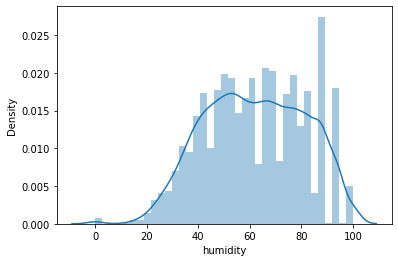

In [23]:
sns.distplot(data["humidity"])

#### Visualisasikan kolom `weather` yang dipisahkan berdasarkan `season`

In [33]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='weather', ylabel='count'>

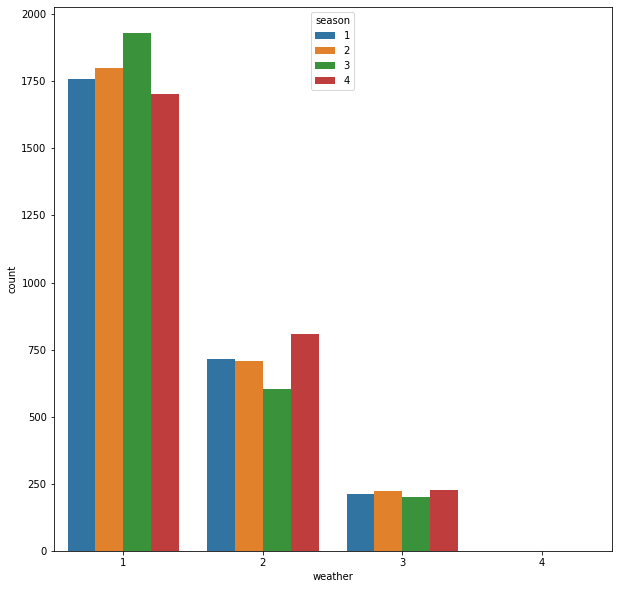

In [34]:
fig, ax = plt.subplots(figsize= (10,10))
grafik = sns.countplot(x="weather", hue="season", data=data)
grafik

In [31]:
grafik.figure.savefig("../../figures/grafik_weather.png")

#### Pilih 2 kolom numerik yang korelasinya tinggi, kemudian visualisasikan korelasinya (dengan _graph_ yang tepat)

c:\users\ameli\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='registered', ylabel='count'>

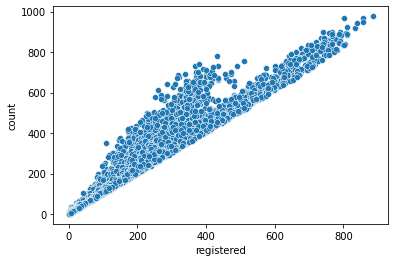

In [26]:
sns.scatterplot(data["registered"], data["count"])
#sns.scatterplot(x="temp",y="atemp",data=data)

#### Visualisasikan _box plot_ untuk kolom `temp` 

<AxesSubplot:xlabel='temp'>

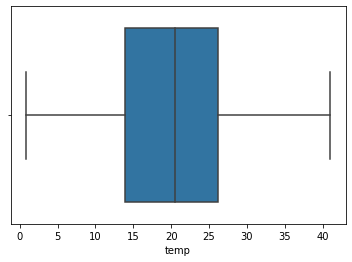

In [15]:
sns.boxplot(x="temp", data=data)

#### Visualisasikan `casual`, `atemp` dan `registered` dengan _bubble plot_

c:\users\ameli\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='casual', ylabel='atemp'>

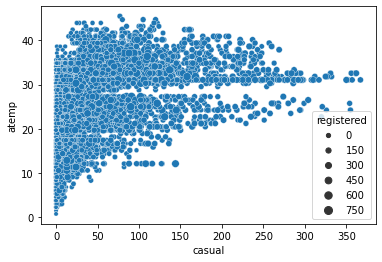

In [27]:
sns.scatterplot(data["casual"], data["atemp"], size=data["registered"])
